# Problem 1 

First attach some common libraries:

In [12]:
# Import Numpy and Pandas and assign aliases "np" and "pd"
import numpy as np
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


The Boston home price dataset can be downloaded from sklearn package:

In [13]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston)

Let's see what's inside boston:

In [14]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

comment: This line prints out the 2nd level of data in the boston object, "DESCR" appears to describe the dataset included.

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

comment: The line below prints out the number of rows and columns for the boston data object and also prints the header for each data column

print("row, cols=", boston.data.shape)

print(boston.feature_names)

comment: The line below accesses the data rows 0 through 5 and prints out their fourth column. Ranged indices use the ":" colon operator. For instance, using the modified line "sum(boston.data[0:506,3])" will gather the CHAS variable and sum up the entire column. This one in particular equated to 35, implying 35 tracts are bounded by the Charles River

In [39]:
print("row, cols=", boston.data.shape)
print(boston.feature_names)
sum(boston.data[0:506,3])

row, cols= (506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


35.0

comment: The 0th row with 4th column is accessed in the boston dataset

In [27]:
boston.data[0, 4]

0.538

Transform array to pandas data frame: a data frame is great for holding datasets: each column represents a variable and each row an example.  Columns can be different types. 

In [40]:
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

comment: The line below prints out the first 5 rows and all columns of the pandas dataframe

In [19]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
comment: The line below assigns bostonDF['medv'] to the boston target dataframe. 
    The pandas Dataframe .describe member function of the bostonDF object prints out a data table with statistical information for each column

NameError: name 'comment' is not defined

In [47]:
bostonDF['medv']=boston.target
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


It's useful to see the range (min, max) of each variable when creating a prediction model: the model is unlikely to work well outside the observed data ranges.  

In [56]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


comment: The info() member function prints out the datatype for all dataframe columns; every value in this set is a 64-bit floating point number

In [54]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


The relationship between crime rate and median price doesn't look quite linear...

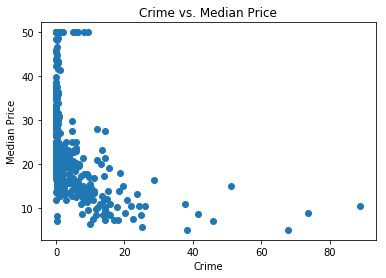

In [57]:
plt.scatter(bostonDF.CRIM, bostonDF.medv)  
plt.title('Crime vs. Median Price')  
plt.xlabel('Crime')  
plt.ylabel('Median Price')  
plt.show()  

comment: The graph generated below shows that if the number of lots zoned for 25,000 sqft is higher, the median price 

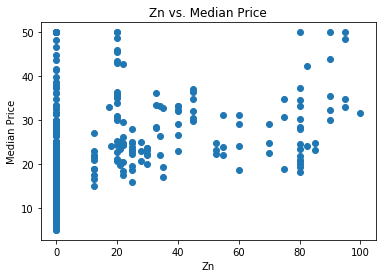

In [62]:
plt.scatter(bostonDF.ZN, bostonDF.medv)  
plt.title('Zn vs. Median Price')  
plt.xlabel('Zn')  
plt.ylabel('Median Price')  
plt.show()

comment: The lines below assigns X to every row in the columns "Per capita crime rate per town" and "proportion of residential land zoned for over 25,000 sqft".
    Additionally, y is assigned to the" Median home value"

In [71]:
X=bostonDF.loc[:, ["CRIM", "ZN"]]
y=bostonDF.loc[:, "medv"]

comment: The LinearRegression() function from sci-kit learn is used to produce a complex object, which is assigned to "lmfit". The object "lmfit" is then passed X and y into its fit() member function to fit a Linear Regression model using X to produce beta coefficients, and y as the predicted output.

In [72]:
lmfit = LinearRegression()
lmfit.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

My model is $\hat{medv}=22.5-0.35 \text{CRIM}+0.12 \text{ZN}$

In [73]:
print(lmfit.intercept_)
print(lmfit.coef_)

22.485628113468223
[-0.35207832  0.11610909]


comment

In [74]:
bostonDF['hat_medv']=lmfit.predict(X)

Differences between actual median home price and predicted home price for the training dataset:

In [ ]:
bostonDF['error']=bostonDF['medv']-bostonDF['hat_medv']

A plot of prediction error vs. a variable is called a residual plot: if the points are evenly spread out above and below zero, then linear model might be okay. If points show a pattern, then maybe linear regression is not a good fit. 

In [ ]:
plt.scatter(bostonDF.ZN, bostonDF.error)  
plt.title('Zn vs. Error')  
plt.xlabel('Zn')  
plt.ylabel('Error')  
plt.show()  

In [ ]:
plt.scatter(bostonDF.CRIM, bostonDF.error)  
plt.title('Crime vs. Error')  
plt.xlabel('Crime')  
plt.ylabel('Error')  
plt.show() 

Mean squared Error on training dataset (really should use a separate test dataset to assess the model's actual performance.

In [ ]:
(bostonDF['error']**2).mean()

In [ ]:
comment

(abs(bostonDF['error'])).mean()